### Decision Trees

In this assignment, you will apply decision trees to a data set. The data we will be using for this exercise is cardiotocographic data. To begin import the data set.

In [1]:
data <- read.table("cardiotocographic.txt", header = TRUE, sep = ",")
str(data)

'data.frame':	2126 obs. of  22 variables:
 $ LB      : int  120 132 133 134 132 134 134 122 122 122 ...
 $ AC      : num  0 0.00638 0.00332 0.00256 0.00651 ...
 $ FM      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ UC      : num  0 0.00638 0.00831 0.00768 0.00814 ...
 $ DL      : num  0 0.00319 0.00332 0.00256 0 ...
 $ DS      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DP      : num  0 0 0 0 0 ...
 $ ASTV    : int  73 17 16 16 16 26 29 83 84 86 ...
 $ MSTV    : num  0.5 2.1 2.1 2.4 2.4 5.9 6.3 0.5 0.5 0.3 ...
 $ ALTV    : int  43 0 0 0 0 0 0 6 5 6 ...
 $ MLTV    : num  2.4 10.4 13.4 23 19.9 0 0 15.6 13.6 10.6 ...
 $ Width   : int  64 130 130 117 117 150 150 68 68 68 ...
 $ Min     : int  62 68 68 53 53 50 50 62 62 62 ...
 $ Max     : int  126 198 198 170 170 200 200 130 130 130 ...
 $ Nmax    : int  2 6 5 11 9 5 6 0 0 1 ...
 $ Nzeros  : int  0 1 1 0 0 3 3 0 0 0 ...
 $ Mode    : int  120 141 141 137 137 76 71 122 122 122 ...
 $ Mean    : int  137 136 135 134 136 107 107 122 122 122 ...
 $ Median  : int  1

Next factor the NSP column using `factor()` and saved the factored data to a new column, NSPF. 

In [2]:
data$NSPF = factor(data$NSP)
str(data)

'data.frame':	2126 obs. of  23 variables:
 $ LB      : int  120 132 133 134 132 134 134 122 122 122 ...
 $ AC      : num  0 0.00638 0.00332 0.00256 0.00651 ...
 $ FM      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ UC      : num  0 0.00638 0.00831 0.00768 0.00814 ...
 $ DL      : num  0 0.00319 0.00332 0.00256 0 ...
 $ DS      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DP      : num  0 0 0 0 0 ...
 $ ASTV    : int  73 17 16 16 16 26 29 83 84 86 ...
 $ MSTV    : num  0.5 2.1 2.1 2.4 2.4 5.9 6.3 0.5 0.5 0.3 ...
 $ ALTV    : int  43 0 0 0 0 0 0 6 5 6 ...
 $ MLTV    : num  2.4 10.4 13.4 23 19.9 0 0 15.6 13.6 10.6 ...
 $ Width   : int  64 130 130 117 117 150 150 68 68 68 ...
 $ Min     : int  62 68 68 53 53 50 50 62 62 62 ...
 $ Max     : int  126 198 198 170 170 200 200 130 130 130 ...
 $ Nmax    : int  2 6 5 11 9 5 6 0 0 1 ...
 $ Nzeros  : int  0 1 1 0 0 3 3 0 0 0 ...
 $ Mode    : int  120 141 141 137 137 76 71 122 122 122 ...
 $ Mean    : int  137 136 135 134 136 107 107 122 122 122 ...
 $ Median  : int  1

Now, partition the data into training and testing (validation) data sets. 

In [3]:
set.seed(1234)
pd <- sample(c(2), nrow(data), replace = TRUE, prob = c(0.8, .2))
train <- data[pd==1,]
validate <- data[pd==2, ]


Using the library `party`, create a decision tree using the function `ctree()`. As there are way too many features using all of the features would result in a cluttered tree. Just use `LB`, `AC` and `FM` to build the tree.

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich




	 Conditional inference tree with 10 terminal nodes

Response:  NSPF 
Inputs:  LB, AC, FM 
Number of observations:  1718 

1) AC <= 0.000834028; criterion = 1, statistic = 263.403
  2) LB <= 136; criterion = 1, statistic = 131.511
    3) FM <= 0.111898; criterion = 1, statistic = 35.729
      4)*  weights = 405 
    3) FM > 0.111898
      5)*  weights = 11 
  2) LB > 136
    6)*  weights = 314 
1) AC > 0.000834028
  7) AC <= 0.002209945; criterion = 1, statistic = 52.155
    8) LB <= 136; criterion = 0.999, statistic = 17.292
      9) FM <= 0.0121396; criterion = 1, statistic = 42.826
        10)*  weights = 103 
      9) FM > 0.0121396
        11)*  weights = 7 
    8) LB > 136
      12)*  weights = 78 
  7) AC > 0.002209945
    13) LB <= 110; criterion = 1, statistic = 18.889
      14)*  weights = 18 
    13) LB > 110
      15) LB <= 147; criterion = 0.965, statistic = 8.877
        16) FM <= 0.2354892; criterion = 0.986, statistic = 10.725
          17)*  weights = 742 
        16)

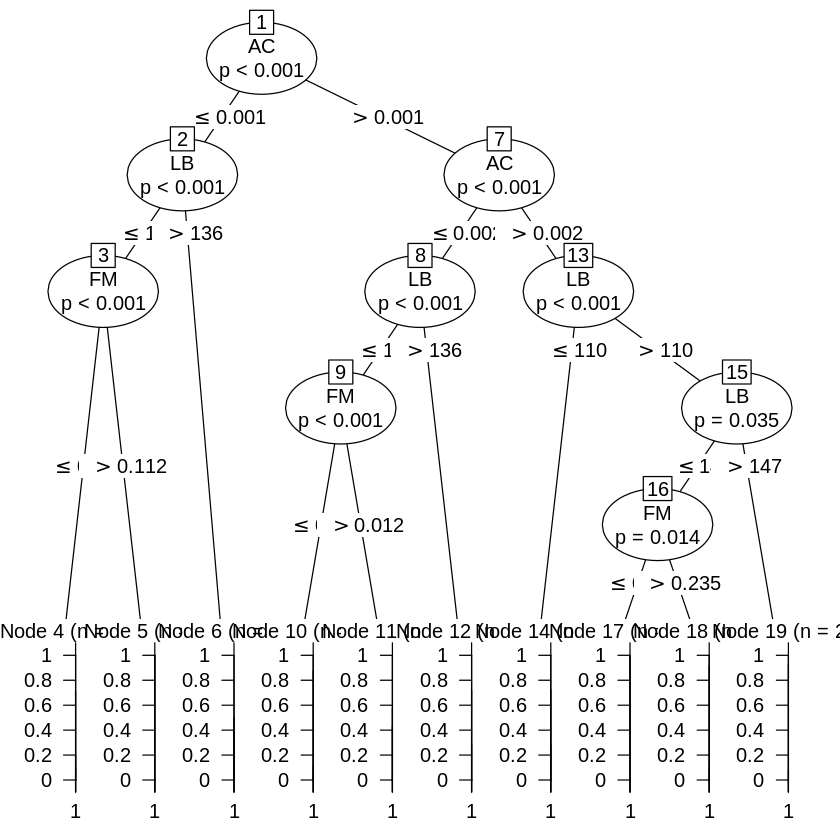

In [4]:
library(party)


tree <- ctree(NSPF ~ LB + AC + FM, data = train)

tree
plot(tree)


	 Conditional inference tree with 5 terminal nodes

Response:  NSPF 
Inputs:  LB, AC, FM 
Number of observations:  1718 

1) AC <= 0.000834028; criterion = 1, statistic = 263.403
  2) LB <= 136; criterion = 1, statistic = 131.511
    3)*  weights = 416 
  2) LB > 136
    4)*  weights = 314 
1) AC > 0.000834028
  5) AC <= 0.002209945; criterion = 1, statistic = 52.155
    6)*  weights = 188 
  5) AC > 0.002209945
    7) LB <= 110; criterion = 1, statistic = 18.889
      8)*  weights = 18 
    7) LB > 110
      9)*  weights = 782 

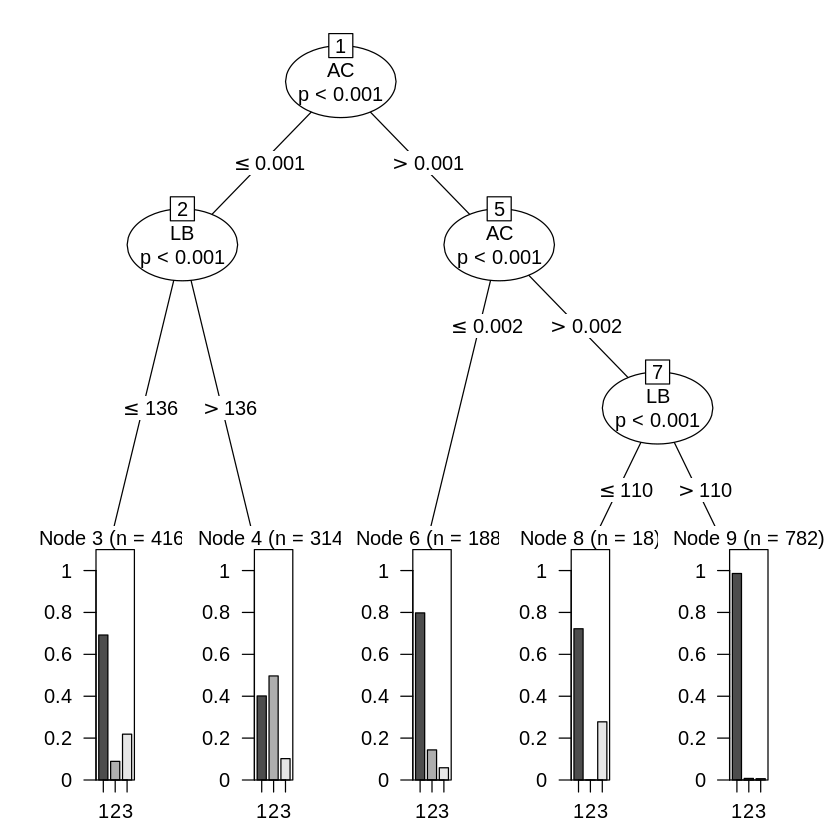

In [5]:
tree <- ctree(NSPF ~ LB + AC + FM, data = train, controls = ctree_control(mincriterion = 0.99, minsplit = 500))

# the 0.99 is the confidence level, 99% confident that the variable is significant
# minsplit is 500 which means that the branch will onlu split into 2 when the sample size is at least 500. This will restrict the tree growth. 

tree

# we observe 9 nodes 
plot(tree)  # the tree is more compact. 
